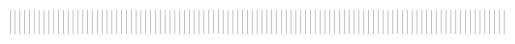

In [2]:
import numpy as np
import matplotlib.pyplot as plt

height = 100
width = 2048

image = np.ones((height, width))

# Add vertical lines (|) spaced every 20 pixels
for x in range(0, width, 20):
    image[:, x] = 0  # Draw a black line

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off the axes
plt.show()

# Convert the image to 8-bit (OpenCV requires this format)
image_8bit = (image * 255).astype(np.uint8)


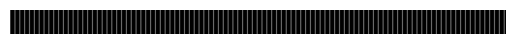

In [3]:
import cv2


edges = cv2.Canny(image_8bit, 200, 255)

coordinates = np.where(edges == 255)[1]  # Extract x-coordinates where edges are found

plt.imshow(edges, cmap='gray')
plt.axis('off')  # Turn off the axes
plt.show()


unique_x_coords = np.unique(coordinates)

line_centers = []
tolerance = 5  # Maximum distance considered to belong to the same line

# Cluster coordinates by proximity
current_cluster = [unique_x_coords[0]]


for coord in unique_x_coords[1:]:
    if coord - current_cluster[-1] <= tolerance:
        current_cluster.append(coord)
    else:
        line_centers.append(np.mean(current_cluster))
        current_cluster = [coord]

# Append the last cluster's center
if current_cluster:
    line_centers.append(np.mean(current_cluster))

# Calculate the distances between the centers of the lines
line_centers = np.array(line_centers)
distances_between_centers = np.diff(line_centers)

Width of the paper: 959 pixels
Height of the paper: 650 pixels


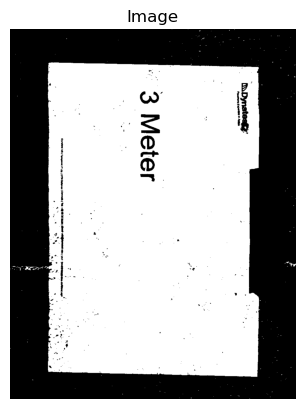

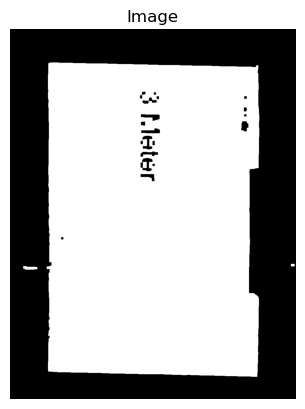

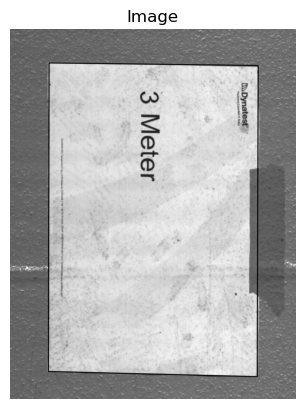

650.0492289050114


In [27]:
def load_image(filepath):
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to load image from {filepath}")
    return image

def display_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

image = load_image("cali1.png")

thresh = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY)[1]


kernel = np.ones((7, 7), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)


contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
area_thresh = 0
big_contour = None
for c in contours:
    area = cv2.contourArea(c)
    if area > area_thresh:
        area_thresh = area
        big_contour = c


page = np.zeros_like(image)
cv2.drawContours(page, [big_contour], 0, (255, 255, 255), -1)


peri = cv2.arcLength(big_contour, True)
corners = cv2.approxPolyDP(big_contour, 0.04 * peri, True)


polygon = image.copy()
cv2.polylines(polygon, [corners], True, (0, 0, 255), 2, cv2.LINE_AA)


def euclidean_distance(pt1, pt2):
    return np.linalg.norm(np.array(pt1) - np.array(pt2))

# Ensure we have 4 corners to compute dimensions
if len(corners) == 4:
    top_left, top_right, bottom_right, bottom_left = [corner[0] for corner in corners]

    # Calculate width and height in pixels
    width = euclidean_distance(top_left, top_right)
    height = euclidean_distance(top_left, bottom_left)

    print(f"Width of the paper: {int(width)} pixels")
    print(f"Height of the paper: {int(height)} pixels")
else:
    print("The contour does not have exactly 4 corners, unable to calculate dimensions.")

# Display the result
display_image(thresh)
display_image(morph)
display_image(polygon)

print(height)
